
## Table of Contents

1. [Introduction](#Introduction)
2. [Data Source](#Data-Source)
3. [Importing Libraries and Modules](#Importing-Libraries-and-Modules)
4. [Configuring NumPy Display Options](#Configuring-NumPy-Display-Options)
5. [Data Loading and Preprocessing](#Data-Loading-and-Preprocessing)
6. [Data Analysis](#Data-Analysis)
7. [Conclusions](#Conclusions)
8. [Future Work](#Future-Work)
9. [References](#References)
       


# Introduction

*This notebook aims to explore various trends in the NBA. We will be using a dataset that includes the complete history of National Basketball Association (NBA) data to look at associations between teams, win-rates, playoff appearances, and more.*

The main objectives of this project are:

1. Exploratory Data Analysis
2. Inspect, Clean and validating the dataset 
3. Discoving relationships (Quantitative & Categorical) Variables

Let's get started!


# [NBA Trends Project](https://github.com/fivethirtyeight/data/blob/master/nba-elo/nbaallelo.csv)
This data was originally sourced from 538's Analysis of the [Complete History Of The NBA](http://fivethirtyeight.com/interactives/the-complete-history-of-every-nba-team-by-elo) and contains the original, unmodified data from [Basketball Reference](http://www.basketball-reference.com/) as well as several additional variables 538 added to perform their own analysis. 


### Importing Libraries and Modules

- `pandas` and `numpy` are fundamental packages for data manipulation and numerical computations.
- `scipy.stats` provides statistical functions, including Pearson correlation and Chi-squared tests.
- `matplotlib` and `seaborn` are used for data visualization.


In [17]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### Configuring NumPy Display Options
This section configures how NumPy displays arrays in the output. The settings make it easier to read and interpret the numerical results by controlling the number of decimal places and suppressing the scientific notation for small numbers.



In [18]:
np.set_printoptions(suppress=True, precision = 2)

# ----------------------------------------------------------------
# suppress=True: When this option is set to True, it prevents NumPy from using the scientific notation to display 
# small numbers. For example, instead of displaying 1.23e-4, it will display 0.000123.

# precision=2: This sets the number of decimal places to 2 when displaying array elements. 
# So, a number like 12.34567 would be displayed as 12.35.

In [ ]:
### Load NBA Game Data

This code reads the NBA games dataset into a pandas DataFrame and displays the first five rows to get an initial overview of the data.


In [26]:
from IPython.display import display
# This allows you to insert other code after the display() function while maintaining the nicer, more readable output.
display(nba.head())
print(nba.dtypes)
nba = nba.replace(0,np.nan)
print('\nShow me where there is Null Values')
display(nba.isnull().sum())
display(nba.describe(include='all'))
#print(pd.Categorical(nba.opp_fran))


,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,NaN,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,NaN,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,NaN,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,NaN,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,NaN,68,63,W,0.339290,5


game_id           object
year_id            int64
fran_id           object
opp_fran          object
game_location     object
is_playoffs      float64
pts                int64
opp_pts            int64
game_result       object
forecast         float64
point_diff         int64
dtype: object

Show me where there is Null Values


game_id              0
year_id              0
fran_id              0
opp_fran             0
game_location        0
is_playoffs      22465
pts                  0
opp_pts              0
game_result          0
forecast             0
point_diff           0
dtype: int64

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
count,24359,24359.000000,24359,24359,24359,1894.0,24359.000000,24359.000000,24359,24359.000000,24359.000000
unique,22596,NaN,5,53,3,NaN,NaN,NaN,2,NaN,NaN
top,201103310SAS,NaN,Celtics,Sixers,H,NaN,NaN,NaN,W,NaN,NaN
freq,2,NaN,5997,1411,12240,NaN,NaN,NaN,12953,NaN,NaN
mean,NaN,1986.916581,NaN,NaN,NaN,1.0,103.384663,102.438154,NaN,0.527805,0.946508
std,NaN,17.427172,NaN,NaN,NaN,0.0,14.724792,14.812181,NaN,0.213054,13.341020
min,NaN,1947.000000,NaN,NaN,NaN,1.0,43.000000,38.000000,NaN,0.024271,-62.000000
25%,NaN,1974.000000,NaN,NaN,NaN,1.0,94.000000,93.000000,NaN,0.359191,-8.000000
50%,NaN,1988.000000,NaN,NaN,NaN,1.0,103.000000,102.000000,NaN,0.533177,2.000000
75%,NaN,2002.000000,NaN,NaN,NaN,1.0,113.000000,112.000000,NaN,0.698763,10.000000


### Correlation Between Forecasted and Actual NBA Team Wins
This code calculates the Pearson correlation between forecasted and actual wins for NBA teams. It provides a numerical measure to understand the strength and statistical significance of this relationship.

In [27]:

# Group the data by 'fran_id' and sum the 'forecast' and 'game_result' == 'W'
grouped_data = nba.groupby('fran_id').agg(
    total_forecast=pd.NamedAgg(column='forecast', aggfunc='sum'),
    total_wins=pd.NamedAgg(column='game_result', aggfunc=lambda x: (x == 'W').sum())
)

# Calculate the Pearson correlation between 'total_forecast' and 'total_wins'
correlation_coefficient_for_ForecastAndWins, p_value = pearsonr(grouped_data['total_forecast'],\
                                                                grouped_data['total_wins'])


print(f"The Pearson correlation between total forecast and total wins is \
{correlation_coefficient_for_ForecastAndWins.round(4)}, indicating a strong positive relationship. The p-value is \
{p_value}, suggesting the result is statistically significant.\n")
print('Lets investigate the data to find out why.')



The Pearson correlation between total forecast and total wins is 0.9989, indicating a strong positive relationship. The p-value is 4.381621774431876e-05, suggesting the result is statistically significant.

Lets investigate the data to find out why.


###  Betting Smart: An In-Depth Analysis of NBA Teams' Win-Loss Records and Home-Away Advantages

This code analyzes historical NBA game data to provide insights into team performance. It calculates metrics like total wins, win-loss difference, and win probability for each team. Additionally, it breaks down wins and losses into home and away games, offering a more nuanced view of team success.

In [21]:
# Import pandas for data manipulation
import pandas as pd

# Load NBA game data
nba_data = pd.read_csv('nba_games.csv')

# Calculate the range of years in the dataset
earliest_year = nba_data.year_id.min()
latest_year = nba_data.year_id.max()
time_span = latest_year - earliest_year

# Display basic information about the dataset
print(f"The dataset covers NBA games from {earliest_year} to {latest_year}.")
print(f"This spans a total of {time_span} years.")

# Generate a DataFrame with total wins and losses for each team
team_win_loss_stats = pd.crosstab(index=nba_data['fran_id'], columns=nba_data['game_result'])

# Add columns for the total games played and the difference between wins and losses
team_win_loss_stats['Total_Games'] = team_win_loss_stats['W'] + team_win_loss_stats['L']
team_win_loss_stats['Win_Loss_Difference'] = team_win_loss_stats['W'] - team_win_loss_stats['L']

# Calculate and round the probability of winning for each team
team_win_loss_stats['Win_Probability'] = (team_win_loss_stats['W'] / team_win_loss_stats['Total_Games']).round(2)
team_win_loss_stats['Loss_Probability'] = (team_win_loss_stats['L'] / team_win_loss_stats['Total_Games']).round(2)

# Sort the DataFrame by the difference between wins and losses
team_win_loss_stats_sorted = team_win_loss_stats.sort_values(by='Win_Loss_Difference', ascending=False)

# Display the sorted DataFrame
display(team_win_loss_stats_sorted)

# Create a DataFrame to capture win/loss stats based on the location of the game (Home/Away)
location_based_win_loss = pd.crosstab(index=nba_data['fran_id'], 
                                      columns=[nba_data['game_location'], nba_data['game_result']])

# Calculate aggregate wins and losses
location_based_win_loss['Aggregate_Wins'] = location_based_win_loss[('H', 'W')] + location_based_win_loss[('A', 'W')]
location_based_win_loss['Aggregate_Losses'] = location_based_win_loss[('H', 'L')] + location_based_win_loss[('A', 'L')]

# Calculate probabilities based on location
location_based_win_loss['Home_Win_Probability'] = location_based_win_loss[('H', 'W')] / location_based_win_loss['Aggregate_Wins']
location_based_win_loss['Home_Loss_Probability'] = 1.0 - location_based_win_loss['Home_Win_Probability']
location_based_win_loss['Away_Win_Probability'] = location_based_win_loss[('A', 'W')] / location_based_win_loss['Aggregate_Wins']
location_based_win_loss['Away_Loss_Probability'] = 1.0 - location_based_win_loss['Away_Win_Probability']

# Display the DataFrame with rounded probabilities
display(location_based_win_loss.round(2))



The dataset covers NBA games from 1947 to 2015.
This spans a total of 68 years.


game_result,L,W,Total_Games,Win_Loss_Difference,Win_Probability,Loss_Probability
fran_id,,,,,,
Celtics,2480,3517,5997,1037,0.59,0.41
Spurs,1770,2539,4309,769,0.59,0.41
Thunder,1948,2230,4178,282,0.53,0.47
Knicks,2914,2855,5769,-59,0.49,0.51
Nets,2294,1812,4106,-482,0.44,0.56


game_location     A           H        N    Aggregate_Wins Aggregate_Losses  \
game_result       L     W     L     W  L  W                                   
fran_id                                                                       
Celtics        1541  1356   939  2161  0  0           3517             2480   
Knicks         1781  1132  1132  1722  1  1           2854             2913   
Nets           1384   664   908  1145  2  3           1809             2292   
Spurs          1148   998   622  1541  0  0           2539             1770   
Thunder        1251   853   697  1373  0  4           2226             1948   

game_location Home_Win_Probability Home_Loss_Probability Away_Win_Probability  \
game_result                                                                     
fran_id                                                                         
Celtics                       0.61                  0.39                 0.39   
Knicks                        0.60                  0.40                 0.40   
Nets                          0.63                  0.37                 0.37   
Spurs                         0.61                  0.39                 0.39   
Thunder                       0.62                  0.38                 0.38   

game_location Away_Loss_Probability  
game_result                          
fran_id                              
Celtics                        0.61  
Knicks                         0.60  
Nets                           0.63  
Spurs                          0.61  
Thunder                        0.62

### Informed Betting: A Comprehensive Guide to NBA Teams' Winning Records Over 68 Years

This code snippet performs multiple tasks to visualize NBA team performance over the years. It first aggregates the total number of wins for each team from the NBA dataset and calculates the average number of wins per year. It then sorts the teams by their total wins and uses Seaborn to create two bar plots: one showing the total number of wins for each team and another showing the average number of wins per year. The plots are displayed with appropriately labeled axes and titles.

,total_wins,avg_wins_per_year
fran_id,,
Celtics,3517,51.72
Knicks,2855,41.99
Spurs,2539,37.34
Thunder,2230,32.79
Nets,1812,26.65



Here is some visualization based on the total wins and the average wins per year over a 68 year period
to give you more confidence on the team(s) you decided to BET on...



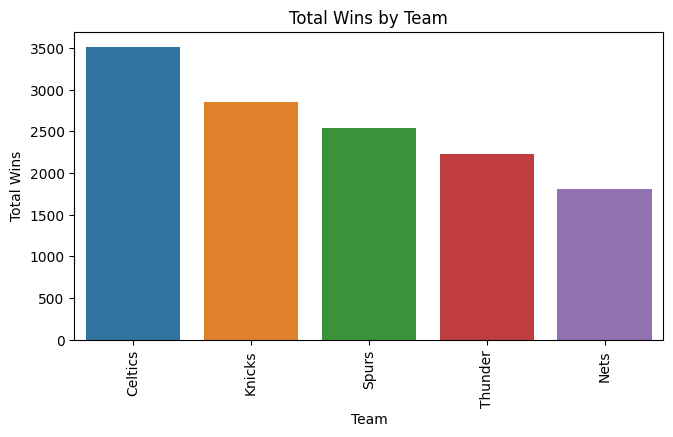

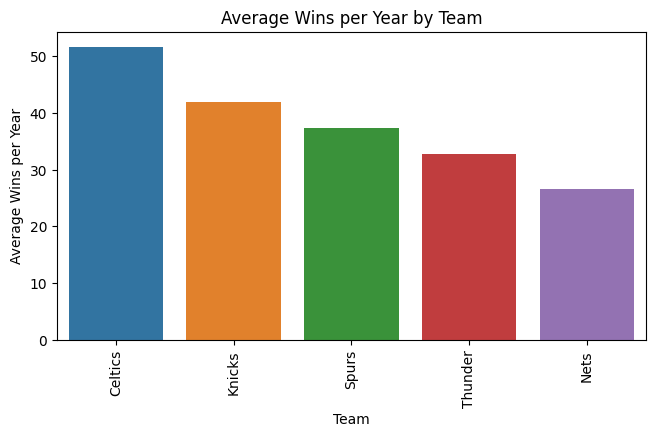

In [23]:
# Group by team and count wins
team_wins = nba.groupby('fran_id').agg(
    total_wins=pd.NamedAgg(column='game_result', aggfunc=lambda x: (x == 'W').sum())
)

# Calculate the individual average wins per team per year
team_wins['avg_wins_per_year'] = team_wins['total_wins'] / time_span
team_wins['avg_wins_per_year'] = team_wins['avg_wins_per_year'].round(2)

# Sort team_wins by total_wins for visualization
team_wins_sorted = team_wins.sort_values(by='total_wins', ascending=False)
display(team_wins_sorted)

print('\nHere is some visualization based on the total wins and the average wins per year over a 68 year period\n\
to give you more confidence on the team(s) you decided to BET on...\n')

# Barplot for total wins
plt.figure(figsize=(7.6, 4))
sns.barplot(x=team_wins_sorted.index, y='total_wins', data=team_wins_sorted)
plt.title('Total Wins by Team')
plt.xlabel('Team')
plt.ylabel('Total Wins')
plt.xticks(rotation=90)
plt.show()

# Barplot for average wins per year
plt.figure(figsize=(7.6, 4))
sns.barplot(x=team_wins_sorted.index, y='avg_wins_per_year', data=team_wins_sorted)
plt.title('Average Wins per Year by Team')
plt.xlabel('Team')
plt.ylabel('Average Wins per Year')
plt.xticks(rotation=90)
plt.show()


### Analyzing Top 10 Performing Years for Each NBA Team

This code identifies and displays the top 10 performing years for each NBA team based on the number of wins. It sorts the teams by their total wins and then further breaks down the data to show the number of wins, total points, and average points for each team during those years. The output could provide insights into the most successful periods in the history of each NBA team.

The charts below give pattern insights on each team perfomance over the 68 period. The data also highlightsthe top 10 years for each team


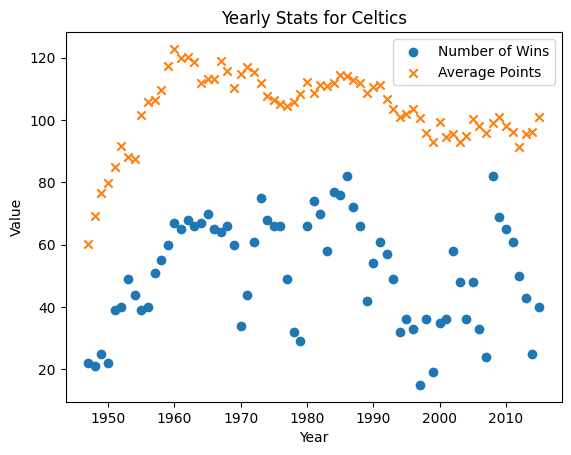


 1 PLACE
Top 10 years for the Celtics:
         wins  total_points  average_points
year_id                                    
2008       82         10689           98.97
1986       82         11419          114.19
1984       77         11744          111.85
1985       76         11788          114.45
1973       75         10643          112.03
1981       74         10765          108.74
1987       72         11838          112.74
1982       70         10450          111.17
1965       70         10425          113.32
2009       69          9705          101.09


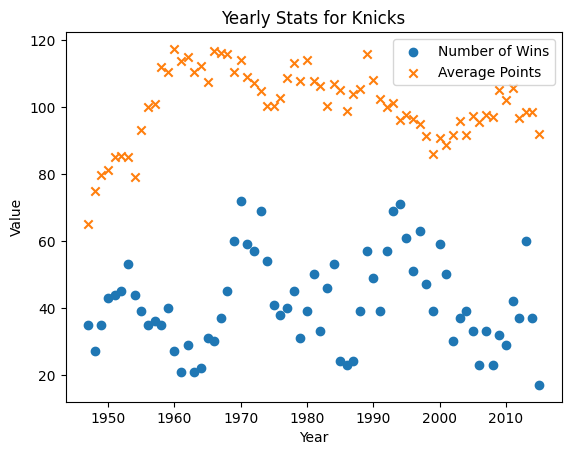


 2 PLACE
Top 10 years for the Knicks:
         wins  total_points  average_points
year_id                                    
1970       72         11526          114.12
1994       71         10295           96.21
1973       69         10375          104.80
1993       69          9813          101.16
1997       63          8731           94.90
1995       61          9080           97.63
2013       60          9259           98.50
1969       60         10152          110.35
2000       59          8906           90.88
1971       59         10239          108.93


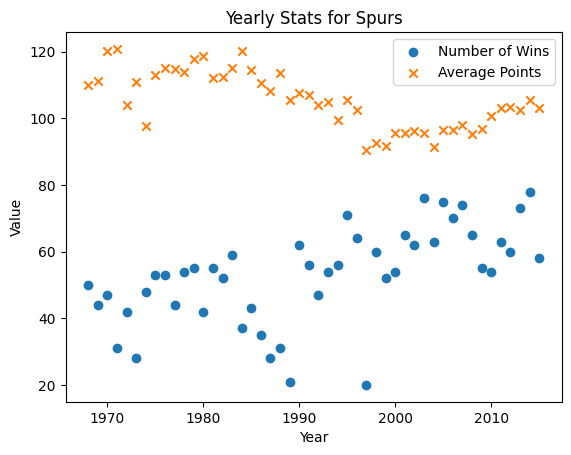


 3 PLACE
Top 10 years for the Spurs:
         wins  total_points  average_points
year_id                                    
2014       78         11085          105.57
2003       76         10131           95.58
2005       75         10117           96.35
2007       74          9992           97.96
2013       73         10555          102.48
1995       71         10219          105.35
2006       70          9177           96.60
2001       65          9076           95.54
2008       65          9419           95.14
1996       64          9419          102.38


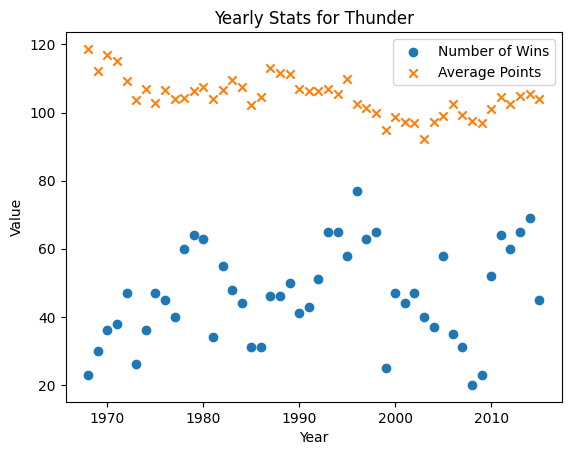


 4 PLACE
Top 10 years for the Thunder:
         wins  total_points  average_points
year_id                                    
1996       77         10549          102.42
2014       69         10652          105.47
1994       65          9162          105.31
2013       65          9752          104.86
1998       65          9198           99.98
1993       65         10788          106.81
1979       64         10518          106.24
2011       64         10338          104.42
1997       63          9535          101.44
1980       63         10430          107.53


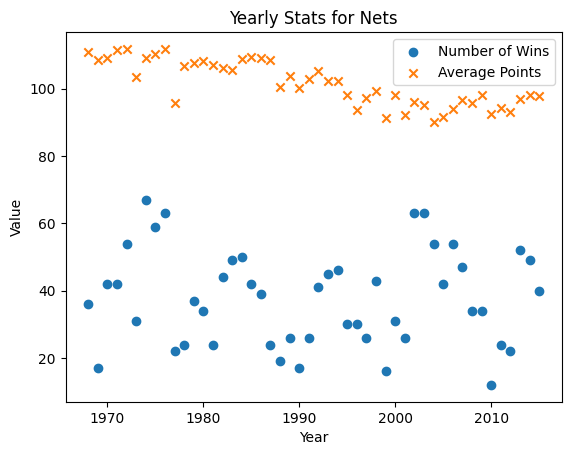


 5 PLACE
Top 10 years for the Nets:
         wins  total_points  average_points
year_id                                    
1974       67         10684          109.02
2002       63          9796           96.04
2003       63          9693           95.03
1976       63         10835          111.70
1975       59          9939          110.43
2006       54          8727           93.84
2004       54          8371           90.01
1972       54         11519          111.83
2013       52          8640           97.08
1984       50         10132          108.95


In [24]:

# Sort teams by wins
sorted_teams = team_wins.sort_values(by='total_wins', ascending=False).index.tolist()

import matplotlib.pyplot as plt
import pandas as pd

def Five_Best_Years(df, team_name):
    # Filter out games for the given team
    team_games = df[df['fran_id'] == team_name]
    
    # Group by year, count wins, and sum points
    yearly_stats = team_games.groupby('year_id').agg(
        wins=pd.NamedAgg(column='game_result', aggfunc=lambda x: (x == 'W').sum()),
        total_points=pd.NamedAgg(column='pts', aggfunc='sum'),
        average_points=pd.NamedAgg(column='pts', aggfunc=lambda x: round(x.mean(), 2))
    )
    
    # Plot the number of wins against the year
    plt.scatter(yearly_stats.index, yearly_stats['wins'], label='Number of Wins', marker='o')
    
    # Plot the average points against the year, using a different marker
    plt.scatter(yearly_stats.index, yearly_stats['average_points'], label='Average Points', marker='x')
    
    plt.title(f"Yearly Stats for {team_name}")
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    
    # Sort by wins and take top 10
    top_10_years = yearly_stats.sort_values(by='wins', ascending=False).head(10)
    
    return top_10_years


# Use the function and print the top 5 years for various teams

print ('The charts below give pattern insights on each team perfomance over the 68 period. The data also highlights\
the top 10 years for each team')
n = 1
for team in sorted_teams:
    top_10 = Five_Best_Years(nba, team)
    print('\n',n, 'PLACE')
    print(f"Top 10 years for the {team}:")
    print(top_10)
    n += 1
    

## Based on these charts Above, I noticed patterns of rising (bullish) and falling (bearish) trends that seem tolast between 5 to 10 years. Did you spot any other patterns or trends? 

### Betting on the Celtics: A Binomial Distribution Analysis of Season Wins

This code uses the binomial distribution to calculate the probabilities of the Boston Celtics winning a specific number of games in a season. The output includes both a detailed breakdown and a visualization of these probabilities for winning between 40 and 60 games. Finally, it provides a sum of probabilities within that range and suggests a winning range (51-53 games) that has the highest likelihood. This analysis aims to instill confidence in those considering betting on the Celtics.

The data below represents the distribution probability
of the celtics winning a game in a given year.

Probability of 40 win(s): 0.00323932860360341559960439816734378837281838059425
Probability of 41 win(s): 0.00545733409006836454185895846080711635295301675797
Probability of 42 win(s): 0.00878814601147472236608582107919573900289833545685
Probability of 43 win(s): 0.01352866039429515519765256925666108145378530025482
Probability of 44 win(s): 0.01991052846277916940631591558030777378007769584656
Probability of 45 win(s): 0.02801503083434948512819850918731390265747904777527
Probability of 46 win(s): 0.03768511835988585384482618678703147452324628829956
Probability of 47 win(s): 0.04846067633409278235800954348633240442723035812378
Probability of 48 win(s): 0.05956624799398915759418571269634412601590156555176
Probability of 49 win(s): 0.06997329281523866073566608747569262050092220306396
Probability of 50 win(s): 0.07854075452090901465762584621188580058515071868896
Probability of 51 win(s): 0.

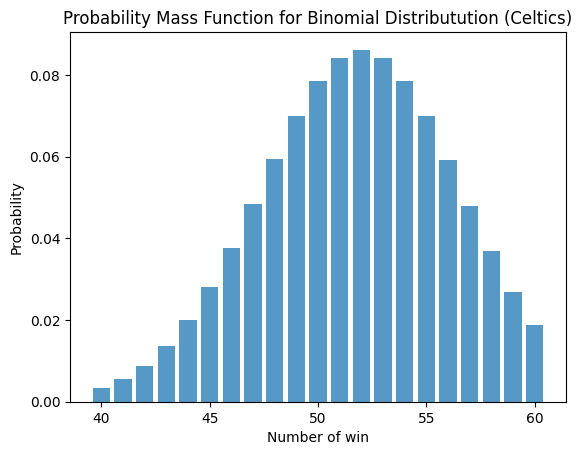

The distribution sum between range(40, 61) wins in a year for the Celtics is: 0.9661966827513683

As you see betting on the Celtics to win between 51-53 times in a year warrants the highest probability

If you picked The Celtics yet are you feeling confident yet ?


In [25]:
from scipy.stats import binom

k_wins = range(40,61) # number of interest 
n_games = 88 # games in a season 
p_win = .59 # probability of win 

print('The data below represents the distribution probability'\
    '\nof the celtics winning a game in a given year.\n')
   
prob = binom.pmf(k_wins,n_games,p_win)
for i, p in enumerate(prob):
    print(f"Probability of {k_wins[i]} win(s): {p:.50f}")


print('\nHere is a visualization expressing each probability')    
    
plt.bar(k_wins,prob,alpha=.75)
plt.title('Probability Mass Function for Binomial Distributution (Celtics)')
plt.xlabel('Number of win')
plt.ylabel('Probability')
plt.show()

print(f'The distribution sum between {k_wins} wins in a year for the Celtics is:', sum(prob))

print('\nAs you see betting on the Celtics to win between 51-53 times in a year warrants the highest probability\
\n\nIf you picked The Celtics yet are you feeling confident yet ?')



## Conclusions

The notebook provided a comprehensive analysis of NBA trends. Key findings include:

- Statistical correlation identifying trends to aid in guidance for NBA teams future winning projections
- Insights can aid in betting opportunties, draftpicks and scout hiring.  

These insights are valuable for sports analysts, teams, and fans.
        


## Future Work

Further analyses could focus on:

- Predictive modeling for game outcomes
- Player performance metrics
- Audience impact on game results



## References

- Original dataset source: [538's NBA Data](https://github.com/fivethirtyeight/data/blob/master/nba-elo/nbaallelo.csv)
